<b> Nome: Joan Vitor Delfino Medeiros 

Matricula: 2016084300 </b>

#  <b> Questão 1 - (1 Ponto) Para cada um dos agentes a seguir, desenvolva uma descrição completando a tabela abaixo sobre o ambiente de tarefas de cada um.  

(a) Agente comentarista de jogo.

(b) Agente sugestor de vinho.

(c) Agente treinador de time (como de basquete).</b>

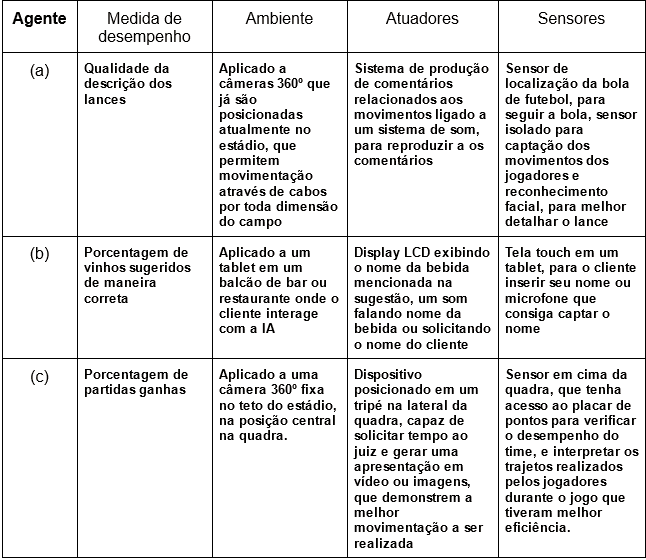

# <b> Questão 2 - (2 Pontos) Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma base.  </b>

_Aprendizado Supervisionado:_ para este caso, o algoritmo vai receber um conjunto de exemplos de treinamento, para os determinados casos que são conhecidos. O objetivo do indutor aqui é construir um classificador que possa determinar corretamente a classe de novos exemplos ainda não rotulados.

R(Dataset): Para aprendizado supervisionado, podemos ter problemas que envolvem regressão ou classificação, podendo essa classificação ter duas ou mais classes. Para este dataset em específico, poderiamos treinar um modelo classificatório binário, que a partir das features ou características como: idade; se possui anemia e diabetes; se fuma ou não; entre outras, poderíamos estimar a propensão do paciente morrer ou não durante o período de acompanhamento.

_Aprendizado Não-Supervisionado:_ o algoritmo não recebe um conjunto já classificado como no modelo anterior. O indutor aqui analisa os exemplos fornecidos e procura analisar e se for possível, determinar um padrão e agrupar de maneira certa. 

R(Dataset): Muito útil dentro da fase de análise exploratória, o aprendizado não-supervisionado poderia ser utilizado nesse dataset na mineração ou procura de grupos naturais de comportamento dos pacientes. Poderiamos encontrar por meio dos clusters, por exemplo, que todos os homens fumantes e diabéticos faleceram durante o período de acompanhamento decorrente de insuficiência cardíarca. Devemos apenas lembrar que por meio destes algoritmos, diferente do supervisionado, não temos um target para o modelo ajustar. Desta forma, a validação e interpretação dos cluster necessita de uma compreensão mais acurada do escopo de negócio aplicado.

_Aprendizado Semi-Supervisionada:_ é fornecido tanto um conjunto de exemplos no treinamento que não possuem rotulação, quanto uma segunda base já rotulada. A meta é melhorar o treinamento dos classificadores quando uma grande quantidade de exemplos não rotulados é disponibilizado juntamente com um pequeno conjunto de exemplos rotulados.

R(Dataset): No muito mundo real de dados as vezes não temos todos os dados para treinar nosso modelo. Quando os dados faltantes estão nas váriáveis ou features, há diversas técnicas que podemos utilizar para suprir essa falta, mas quando faltam muitos dados no target, o rótulo que deve supervisionar o treinamento, o tratamento é mais difícil. Desta forma existem os algoritmos de aprendizado semi-supervisionado. Em nosso dataset, por exemplo, dos aproximadamente 300 registros, poderíamos imaginar que temos apenas 15% rotulados corretamente e todos esses rótulos são positivos, enquanto que os demais são faltantes. Desta forma, poderíamos aplicar algum algoritmo como o PU Learning para estimar a propensão de insuficiência cardíaca dos demais.

_Aprendizado por Reforço:_ a aprendizagem é adquirida através da tentativa e erro. Nesse caso não é exigido um conjunto externo de exemplos ou um modelo exemplo.

R(Dataset): Assim como o aprendizado supervisionado, o aprendizado por reforço realiza um mapeamento entre os dados de entrada (features) e saída (target). Contudo a abordagem desse mapeamento é o que distingue os tipos de aprendizado. Por meio de uma lógica de punição e recompensa, o sistema estabelece um ciruito fechado de ação e feedback reavaliando a cada iteração os seus resultados, onde os resultados positivos são recompensados e os negativos são punidos. Para o nosso dataset esta não é melhor abordagem pois ela necessita de grandes volumes de dados, mas poderiamos hipotecamente implementar um algoritmo de aprendizado por reforço em que a partir das features, ao realizar uma previsão correta do rótulo ele seria retroalimentado com uma recompensa, enquanto que uma previsão incorreta teriamos uma punição.

# <b> Questão 3 - (5 Pontos) Em um Jupyter Notebook (link do collab, GitHub ou arquivo), utilize o método K vizinhos mais próximos na base escolhida na questão anterior para um contexto SUPERVISIONADO e para classificação:  </b>


## Iniciando dependências 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix)

## Banco de dados (Dataset)

In [23]:
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')
#Criada uma variavel de copia dos dados para modificação
c_copy = pd.read_csv('heart_failure_clinical_records_dataset.csv')
#Checagem dos 5 primeiros índices, presentes nos dados
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
x = c_copy['sex'].value_counts() #Porcentagem Homens e Mulheres para o total de participantes
x/len(c_copy)

1    0.648829
0    0.351171
Name: sex, dtype: float64

In [8]:
x = c_copy['smoking'].value_counts() #Porcentagem de Fumantes e Não Fumantes para o total de participantes
x/len(c_copy)

0    0.67893
1    0.32107
Name: smoking, dtype: float64

Text(0, 0.5, 'Pressão Alta')

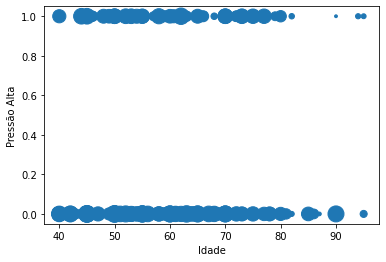

In [20]:
#Gráfico de correlação - modelo Scatter
plt.scatter(heart_failure.age, heart_failure.high_blood_pressure,heart_failure.time) 
plt.xlabel('Idade')
plt.ylabel('Pressão Alta')

#Relacionando Idade, se possui ou não Pressão Alta

In [25]:
#Função describe() utilizada para visualização de estatísticas como média,mediana, desvio padrão, valor mínimo e máximo.
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 3.1 - Aplique processos de pré-processamento e os necessários para execução do método K-NN.

In [26]:
#Visualização das colunas e o tipo de dado guardado. Apurada a frequência de dados quantitativos para utilização da matriz de correlação e métodos PCA e KNN solicitados na questão
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [27]:
#Realizada verificação de dados faltosos
heart_failure.isnull().sum().sum()

0

In [28]:
x = c_copy.drop(["DEATH_EVENT"], axis = 1)
y = c_copy.loc[:, "DEATH_EVENT"]

x = RobustScaler().fit_transform(x)
x

#Treinamento 70% e teste 30%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

### 3.2 - Aplique Correlação ou PCA e selecione um número menor de atributos com esses métodos e justifique sua decisão.

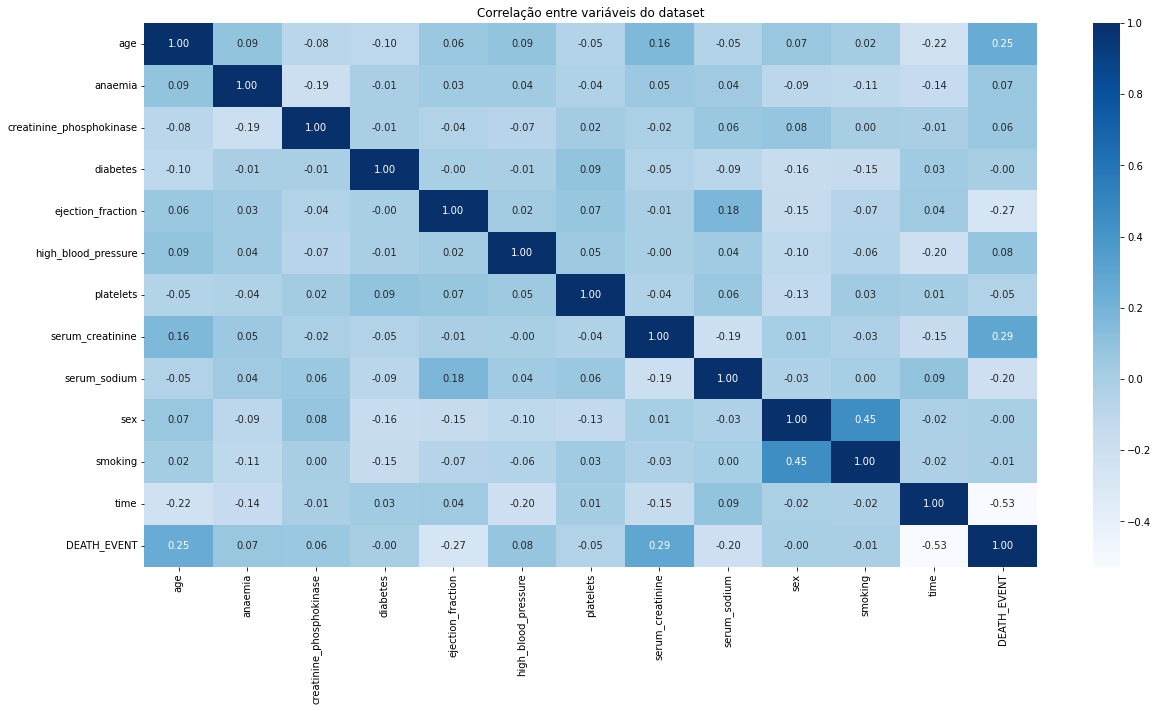

In [29]:
#Realizando então exibição de Correlação
plt.figure(figsize = (20,10))
sns.heatmap(c_copy.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

#### Como observado através da matriz de correlação, os atributos possuem um baixo índice. Dessa forma, optei por não realizar este procedimento, visto que todas as colunas possuem informações potencialmente relevantes para predição do atributo alvo, por isso, através da correlação, não podemos desprezar nenhuma. O método PCA é indicado em casos em que há uma alta quantidade de atributos, diferente da situação atual desse dataset. Assim, escolhi por aplicar PCA, mesmo com uma quantidade menor de atributos.

In [30]:
x = c_copy.drop(["DEATH_EVENT"], axis = 1)
y = c_copy.loc[:, "DEATH_EVENT"]

x = RobustScaler().fit_transform(x)
x

array([[ 0.78947368,  0.        ,  0.7132116 , ...,  0.        ,
         0.        , -0.85384615],
       [-0.26315789,  0.        , 16.35016112, ...,  0.        ,
         0.        , -0.83846154],
       [ 0.26315789,  0.        , -0.22341568, ...,  0.        ,
         1.        , -0.83076923],
       ...,
       [-0.78947368,  0.        ,  3.88829216, ..., -1.        ,
         0.        ,  1.25384615],
       [-0.78947368,  0.        ,  4.64661654, ...,  0.        ,
         1.        ,  1.26923077],
       [-0.52631579,  0.        , -0.1160043 , ...,  0.        ,
         1.        ,  1.30769231]])

In [31]:
#Definido PCA para os 2 atributos principais
PCA_2 = PCA(n_components = 2)

attributes = PCA_2.fit_transform(x)

heart_failure_PCA_2 = pd.DataFrame(attributes, columns = ["PC [1]", "PC [2]"])
heart_failure_PCA_2["DEATH_EVENT"] = y

heart_failure_PCA_2.head()

,PC [1],PC [2],DEATH_EVENT
0,-0.745134,0.924896,1
1,12.485470,9.435619,1
2,-0.722498,-0.576113,1
3,-1.433530,0.201151,1
4,-2.584812,1.642075,1


In [32]:
#Definido PCA para os 5 atributos principais
PCA_5 = PCA(n_components = 5)

attributes = PCA_5.fit_transform(x)

heart_failure_PCA_5 = pd.DataFrame(attributes, columns = ["PC [1]", "PC [2]", "PC [3]", "PC [4]", "PC [5]"])
heart_failure_PCA_5["DEATH_EVENT"] = y

heart_failure_PCA_5.head()

,PC [1],PC [2],PC [3],PC [4],PC [5],DEATH_EVENT
0,-0.745134,0.924896,-0.240843,-1.513819,1.014360,1
1,12.485470,9.435619,-0.311426,0.057668,0.902890,1
2,-0.722498,-0.576113,-1.412599,-1.617696,0.722530,1
3,-1.433530,0.201151,-0.731077,-0.920828,-0.496265,1
4,-2.584812,1.642075,0.428436,-2.706284,2.052002,1


### 3.3 - Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de avaliação e mostre a matriz de confusão) e explique os resultados encontrados.

In [33]:
num_k = [1,2,3,4,5]

knn_list = []

for k in num_k:
  knn_list.append(KNeighborsClassifier(n_neighbors = k))

for knn in knn_list:
  knn.fit(x_train,y_train)

list_resultado = []

for knn in knn_list:
  list_resultado.append(knn.predict(x_test))

list_resultado

[array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0,

#### O método padrão utilizado pela função sklearn é o euclidian para encontrar os valores de K vizinhos definidos.

#### Acurácia: Uma das métricas mais utilizadas por calcular o percentual de acertos, através da razão acertos e total de entrada.

In [34]:
#Acurácia
for result, k in zip(list_resultado, num_k):
    print(f'KNN para K sendo => {k}-NN')
    print(f'Acurácia: {accuracy_score(y_test, result):.4f}')

KNN para K sendo => 1-NN
Acurácia: 0.7222
KNN para K sendo => 2-NN
Acurácia: 0.7444
KNN para K sendo => 3-NN
Acurácia: 0.7667
KNN para K sendo => 4-NN
Acurácia: 0.7667
KNN para K sendo => 5-NN
Acurácia: 0.8111


#### Precisão: Avalia quantidade de verdadeiros positivos sobre a soma de todos os valores positivos

In [35]:
#Precisão
for result, k in zip(list_resultado, num_k):
    print(f'KNN para K sendo => {k}-NN')
    print(f'Precisão: {precision_score(y_test, result):.4f}')

KNN para K sendo => 1-NN
Precisão: 0.5294
KNN para K sendo => 2-NN
Precisão: 0.7143
KNN para K sendo => 3-NN
Precisão: 0.6667
KNN para K sendo => 4-NN
Precisão: 0.7778
KNN para K sendo => 5-NN
Precisão: 0.8462


#### Sensibilidade: Também chamada de recall, é a métrica que avalia a capacidade de detectar com sucesso os resultados classificados como positivos.

In [36]:
#Sensibilidade
for result, k in zip(list_resultado, num_k):
    print(f'KNN para K sendo => {k}-NN')
    print(f'Sensibilidade: {recall_score(y_test, result):.4f}')

KNN para K sendo => 1-NN
Sensibilidade: 0.3462
KNN para K sendo => 2-NN
Sensibilidade: 0.1923
KNN para K sendo => 3-NN
Sensibilidade: 0.3846
KNN para K sendo => 4-NN
Sensibilidade: 0.2692
KNN para K sendo => 5-NN
Sensibilidade: 0.4231


#### Matriz de Confusão: Forma de representar os resultados de um método de classificação dos dados.

In [37]:
#Matriz de Confusão
for result, k in zip(list_resultado, num_k):
    print(f'KNN para K sendo => {k}-NN')
    print(confusion_matrix(y_test, result))

KNN para K sendo => 1-NN
[[56  8]
 [17  9]]
KNN para K sendo => 2-NN
[[62  2]
 [21  5]]
KNN para K sendo => 3-NN
[[59  5]
 [16 10]]
KNN para K sendo => 4-NN
[[62  2]
 [19  7]]
KNN para K sendo => 5-NN
[[62  2]
 [15 11]]


### 3.4 - Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas - correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique os resultados encontrados.

##### Utilizando do método de manhattan os resultados encontrados, foram muito próximos dos encontrados no método padrão do sklearn, fazendo então com que esse seja o melhor método ou o que mais se aproxime dele.

In [38]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = "manhattan")
knn.fit(x_train,y_train)
resultado = knn.predict(x_test)

In [39]:
print(f'Acurácia: {accuracy_score(y_test, resultado):.3f}')
print(f'Precisão: {precision_score(y_test, resultado):.3f}')
print(f'Sensibilidade: {recall_score(y_test, resultado):.3f}\n')
print(f'Matriz de Confusão: \n {confusion_matrix(y_test, resultado)}')

Acurácia: 0.811
Precisão: 0.765
Sensibilidade: 0.500

Matriz de Confusão: 
 [[60  4]
 [13 13]]


##### Como podemos observar, os valores encontrados através do método Minkowski sofreu decrementos, os dispersando dos valores encontrados pela função padrão, dessa forma houve uma piora significativa nas métricas.

In [40]:
knn = KNeighborsClassifier(n_neighbors = 5, metric="minkowski")
knn.fit(x_train, y_train)
resultado = knn.predict(x_test)

In [48]:
print(f'Acurácia: {accuracy_score(y_test, resultado):.3f}')
print(f'Precisão: {precision_score(y_test, resultado):.3f}')
print(f'Sensibilidade: {recall_score(y_test, resultado):.3f}\n')
print(f'Matriz de Confusão: \n {confusion_matrix(y_test, resultado)}')

Acurácia: 0.789
Precisão: 0.733
Sensibilidade: 0.423

Matriz de Confusão: 
 [[60  4]
 [15 11]]


### 3.5 - Melhor K e melhor distância e testar com o conjunto de atributos do item 2.

In [41]:
x = c_copy.drop(["DEATH_EVENT"], axis = 1)
y = c_copy.loc[:, "DEATH_EVENT"]

x = RobustScaler().fit_transform(x)
x

#Treinamento 70% e teste 30%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [42]:
knn = KNeighborsClassifier(n_neighbors = 9, metric = "manhattan")
knn.fit(x_train, y_train)
result = knn.predict(x_test)

print(f'Acurácia: {accuracy_score(y_test, result):.3f}')
print(f'Precisão: {precision_score(y_test, result):.3f}')
print(f'Sensibilidade: {recall_score(y_test, result):.3f}\n')
print(f'Matriz de Confusão: \n {confusion_matrix(y_test, result)}')


Acurácia: 0.778
Precisão: 0.800
Sensibilidade: 0.308

Matriz de Confusão: 
 [[62  2]
 [18  8]]


In [43]:
#Separação dos dados para validação e treinamento
x = heart_failure_PCA_2.drop(['DEATH_EVENT'], axis = 1)
y = heart_failure_PCA_2.loc[:,'DEATH_EVENT']

#Treinamento 70% e teste 30%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [44]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = "manhattan")
knn.fit(x_train, y_train)
result = knn.predict(x_test)

print(f'Acurácia: {accuracy_score(y_test, result):.3f}')
print(f'Precisão: {precision_score(y_test, result):.3f}')
print(f'Sensibilidade: {recall_score(y_test, result):.3f}\n')
print(f'Matriz de Confusão: \n {confusion_matrix(y_test, result)}')



Acurácia: 0.711
Precisão: 0.500
Sensibilidade: 0.423

Matriz de Confusão: 
 [[53 11]
 [15 11]]


In [45]:
#Separação dos dados para validação e treinamento
x = heart_failure_PCA_5.drop(['DEATH_EVENT'], axis = 1)
y = heart_failure_PCA_5.loc[:,'DEATH_EVENT']

x = RobustScaler().fit_transform(x)

#Treinamento 70% e teste 30%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [46]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = "manhattan")
knn.fit(x_train, y_train)
result = knn.predict(x_test)

print(f'Acurácia: {accuracy_score(y_test, result):.3f}')
print(f'Precisão: {precision_score(y_test, result):.3f}')
print(f'Sensibilidade: {recall_score(y_test, result):.3f}\n')
print(f'Matriz de Confusão: \n {confusion_matrix(y_test, result)}')

Acurácia: 0.767
Precisão: 0.667
Sensibilidade: 0.385

Matriz de Confusão: 
 [[59  5]
 [16 10]]


##### Como visto, foram obtidos resultados piores em ambos os casos PCA para 2 ou 5 atributos, em todos os métodos os valores ficaram abaixo do já encontrado anteriormente com outras métricas. Dessa forma, o ideal é não utilizar muitos atributos principais, já que podem acabar dificultando e diminuindo eficácia da predição.

# <b> Questão 4 -  (2 Pontos) Considerando a matriz de confusão abaixo, quais são os valores das métricas listadas abaixo?  </b>

Planilha com os Valores obtidos no Excel

In [48]:
import numpy as np

#Calculo do valor AUC através de uma aproximação trapezoidal

#TPR = (TP/(TP+FN))  
#FPR = (FP/(FP+TN))
TPR = 0.785
FPR = 0.035

X = np.array([0, FPR, 1])
Y = np.array([0, TPR, 1])

AUC = np.trapz(Y,X)
print(f'Valor AUC = Area Under Curve = {AUC:.3f}')

Valor AUC = Area Under Curve = 0.875


## Como você resolveria o problema dessa base de dados observando as métricas de avaliação?

### O problema encontrado foi a diferença enorme quando comparado a classe *Manga* com as demais classes, gerando um desbalanceamento, que se não tratado em alguns casos podem acabar acarretando em problemas na construção do modelo. Uma forma de lidar, seria fazer uma reestruturação dos dados, procurando igualar o número de observações, através por exemplo do método DownSampling ou realizar a coleta de mais dados.

# <b> Ponto Extra -  Elabore uma pergunta e responda sobre "Preconceito e Inteligência Artificial", refletindo aspectos importantes do método que uma pessoa engenheiro de dados/cientista de dados deve conhecer e se preocupar garantindo ética nos modelos criados. </b>

### *Quais as causas para que se tenhamos tanto preconceito desencadeados por Inteligências Artificiais?*

Segundo uma pesquisa que foi realizada com o apoio da Fundação Mozilla no ano de 2021, foi apontado que tecnologias digitais que utilizam procedimentos algoritmicos de Inteligencia Artificial podem acabar intensificando o racismo estrutural no Brasil. Um dos grandes problemas são as bases de dados de grande escala, que não possuem aplicação de qualquer mecanismo capaz de atender as complexidades sociais.

Com o intuito de ser possuir mais informações sobre o problema, foram entrevistadas pessoas negras ligadas a área de Inteligência Artificial e realizado sempre um mesmo conjunto de perguntas. Boa parte dos entrevistados, possuíam uma preocupação em comum, sendo a principal delas a invisibilidade das contribuições de pessoas negras, afrocentradas na tecnologia e falta de inclusão destas pessoas dentro da área de IA. 

Além então da grande desproporcionalidade de pessoas negras nesse meio, temos ainda um caso como o da Amazon que lançou uma vaga para Engenheiro, e uma companhia com uma ferramenta experimental de contratação usou uma IA para enviar o anúncio da vaga para candidatos que atendessem a qualificação, mas a vaga só foi divulgada para homens, sendo também um preconceito praticado através da misoginia.

No entanto, é dificil conseguirmos corrigir problemas de preconceitos da própria Inteligencia Artificial, por termos grandes desafios a serem tratados, a exemplo em dados de larga escala como citados no início, a introdução de um certo tipo de prática no começo nem sempre é muito clara, já que não se é possível perceber impactos posteriores nos dados, e quando notados pode ser muito tarde para saber de onde exatamente veio o viés e de como se livrar dele. Sendo esse apenas um dos problemas, tendo ainda a falta de contexto Social, os processos imperfeitos e as definições corretas de Justiça.